In [145]:
%matplotlib notebook

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates

In [147]:
crimes_df = "Chicago_Crimes_Data.csv"

crimes_df = pd.read_csv(crimes_df, encoding="utf=8")

crimes_df

,ID,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
0,11614273,1/1/2017 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
1,11622471,1/1/2017 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
2,11255786,1/1/2017 0:00,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,False,2017,NaN,NaN
3,11259747,1/1/2017 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
4,11267468,1/1/2017 0:00,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...
624511,12870310,9/24/2022 17:00,810,THEFT,OVER $500,False,2022,41.943197,-87.680179
624512,12870245,9/24/2022 23:58,479,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",False,2022,41.910007,-87.634675
624513,12870060,9/26/2022 9:00,1120,DECEPTIVE PRACTICE,FORGERY,False,2022,41.934632,-87.718727
624514,12841629,9/27/2022 21:30,330,ROBBERY,AGGRAVATED,False,2022,41.879408,-87.631432


In [148]:
crimes_df = crimes_df.set_index(["ID"])
crimes_df

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11614273,1/1/2017 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
11622471,1/1/2017 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
11255786,1/1/2017 0:00,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,False,2017,NaN,NaN
11259747,1/1/2017 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
11267468,1/1/2017 0:00,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
12870310,9/24/2022 17:00,810,THEFT,OVER $500,False,2022,41.943197,-87.680179
12870245,9/24/2022 23:58,479,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",False,2022,41.910007,-87.634675
12870060,9/26/2022 9:00,1120,DECEPTIVE PRACTICE,FORGERY,False,2022,41.934632,-87.718727


In [149]:
crimes_df = crimes_df.dropna(how='any')

In [150]:
crimes_df.count()

Date            621935
IUCR            621935
Primary Type    621935
Description     621935
Arrest          621935
Year            621935
Latitude        621935
Longitude       621935
dtype: int64

In [151]:
crimes_df

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
10824428,1/1/2017 0:00,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,False,2017,41.808902,-87.599253
10827683,1/1/2017 0:00,810,THEFT,OVER $500,False,2017,41.979006,-87.906463
10801101,1/1/2017 0:00,1320,CRIMINAL DAMAGE,TO VEHICLE,False,2017,41.759884,-87.597242
10801104,1/1/2017 0:00,486,BATTERY,DOMESTIC BATTERY SIMPLE,True,2017,41.774406,-87.635727
10801111,1/1/2017 0:00,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,True,2017,41.947226,-87.655523
...,...,...,...,...,...,...,...,...
12870310,9/24/2022 17:00,810,THEFT,OVER $500,False,2022,41.943197,-87.680179
12870245,9/24/2022 23:58,479,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",False,2022,41.910007,-87.634675
12870060,9/26/2022 9:00,1120,DECEPTIVE PRACTICE,FORGERY,False,2022,41.934632,-87.718727


In [152]:
x_axis = [1, 2, 3, 4, 5]
labels = ["2017", "2018", "2019", "2020", "2021"]

In [153]:
theft = [0.238460, 0.242401, 0.230645, 0.182012, 0.201069]
battery_crimes = [0.185382, 0.188377, 0.194221, 0.216037, 0.211089]
criminal_damage = [0.110827, 0.106569, 0.104634, 0.125469, 0.142953]
combined_crimes = [0.5347, 0.5373, 0.5295, 0.5235, 0.5551]

<IPython.core.display.Javascript object>


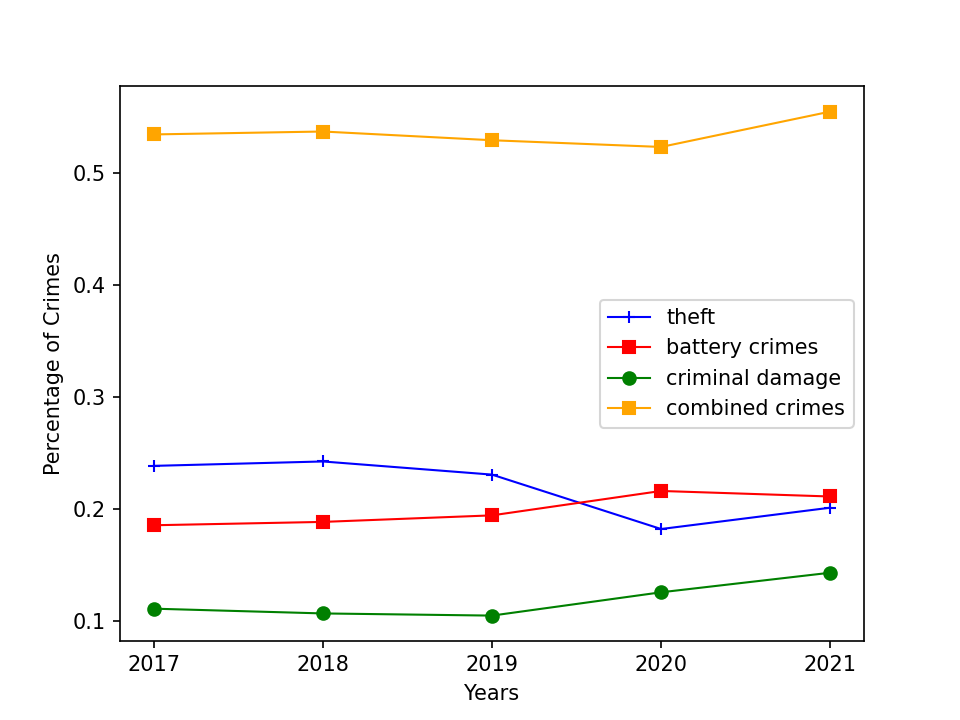

In [154]:
theft, = plt.plot(x_axis, theft, marker="+",color="blue", linewidth=1, label="theft")
battery_crimes, = plt.plot(x_axis, battery_crimes, marker="s", color="red", linewidth=1, label="battery crimes")
criminal_damage, = plt.plot(x_axis, criminal_damage, marker="o",color="green", linewidth=1, label="criminal damage")
combined_crimes, = plt.plot(x_axis, combined_crimes, marker="s",color="orange", linewidth=1, label="combined crimes")

plt.legend(handles=[theft, battery_crimes, criminal_damage, combined_crimes], loc="best")

plt.xlabel("Years")
plt.ylabel("Percentage of Crimes")

plt.xticks(x_axis, labels)

plt.savefig("Crime Percentage of Chicago Between 2017-2021.png")

In [167]:
percent_crime = pd.DataFrame({
    "Year": [2017, 2017, 2107, 2017, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021],
    "Crime Type": ["Theft", "Battery Crimes", "Criminal Damage", "All Three", "Theft", "Battery Crimes", "Criminal Damage", "All Three", "Theft", "Battery Crimes", "Criminal Damage", "All Three", "Theft", "Battery Crimes", "Criminal Damage", "All Three", "Theft", "Battery Crimes", "Criminal Damage", "All Three"],
    "% of Total Crimes": [23.8460, 18.5382, 11.0827, 53.47, 24.2401, 18.8377, 10.6569, 53.73, 23.0645, 19.4221, 10.4634, 52.95, 18.2012, 21.6037, 12.5469, 52.35, 20.1069, 21.1089, 14.2953, 55.51]
})

percent_crime

,Year,Crime Type,% of Total Crimes
0,2017,Theft,23.8460
1,2017,Battery Crimes,18.5382
2,2107,Criminal Damage,11.0827
3,2017,All Three,53.4700
4,2018,Theft,24.2401
5,2018,Battery Crimes,18.8377
6,2018,Criminal Damage,10.6569
7,2018,All Three,53.7300
8,2019,Theft,23.0645
9,2019,Battery Crimes,19.4221


In [168]:
percent_crime = percent_crime.set_index(["Year"])
percent_crime

,Crime Type,% of Total Crimes
Year,,
2017,Theft,23.8460
2017,Battery Crimes,18.5382
2107,Criminal Damage,11.0827
2017,All Three,53.4700
2018,Theft,24.2401
2018,Battery Crimes,18.8377
2018,Criminal Damage,10.6569
2018,All Three,53.7300
2019,Theft,23.0645


In [169]:
percent_crime["% of Total Crimes"] = percent_crime["% of Total Crimes"].map("{:.2f}%".format)
percent_crime

,Crime Type,% of Total Crimes
Year,,
2017,Theft,23.85%
2017,Battery Crimes,18.54%
2107,Criminal Damage,11.08%
2017,All Three,53.47%
2018,Theft,24.24%
2018,Battery Crimes,18.84%
2018,Criminal Damage,10.66%
2018,All Three,53.73%
2019,Theft,23.06%


In [170]:
theft_trend = percent_crime[percent_crime["Crime Type"] == "Theft"]
theft_trend

,Crime Type,% of Total Crimes
Year,,
2017,Theft,23.85%
2018,Theft,24.24%
2019,Theft,23.06%
2020,Theft,18.20%
2021,Theft,20.11%


In [171]:
battery_trend = percent_crime[percent_crime["Crime Type"] == "Battery Crimes"]
battery_trend

,Crime Type,% of Total Crimes
Year,,
2017,Battery Crimes,18.54%
2018,Battery Crimes,18.84%
2019,Battery Crimes,19.42%
2020,Battery Crimes,21.60%
2021,Battery Crimes,21.11%


In [172]:
criminal_trend = percent_crime[percent_crime["Crime Type"] == "Criminal Damage"]
criminal_trend

,Crime Type,% of Total Crimes
Year,,
2107,Criminal Damage,11.08%
2018,Criminal Damage,10.66%
2019,Criminal Damage,10.46%
2020,Criminal Damage,12.55%
2021,Criminal Damage,14.30%


In [173]:
total_trend = percent_crime[percent_crime["Crime Type"] == "All Three"]
total_trend

,Crime Type,% of Total Crimes
Year,,
2017,All Three,53.47%
2018,All Three,53.73%
2019,All Three,52.95%
2020,All Three,52.35%
2021,All Three,55.51%
